In [4]:
import pandas as pd
df = pd.read_csv('/Users/henrysun_1/Desktop/Duke/2024-2025/Summer 2024/fishics/models/Q2A/allseasons.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df = df[df['sampling_bout']=='Aug_23']
df
fish_asvs = df.iloc[:, 11:]
fish_asvs

,Atl_croaker_(nibea98),Bay_anchovy,Black_drum_or_Spot,Black_sea_bass,Brd_striped_anchovy,Little_tunny_or_skipjack_tuna,Nor_sea_robin,Scup,Smallmouth_flounder,Southern_kingfish(nibea95),...,White_catfish,Atl_salmon,Longitude,Latitude,Surface_Temp,Bottom_Temp,Surface_Salinity,Bottom_Salinity,temp_strat,salt_strat
56,0.020177,0.009888,0.019700,0.085628,0.007203,0.007127,0.752152,0.017693,0.000452,0.004567,...,0.0,0.0,-73.860883,39.769483,23.452717,14.988620,31.562784,32.429375,8.464097,0.866592
57,0.044937,0.020751,0.012989,0.029528,0.013369,0.001347,0.667796,0.041293,0.008777,0.004535,...,0.0,0.0,-74.005967,39.753667,22.500439,16.974112,31.797065,32.248938,5.526328,0.451874
58,0.063512,0.015948,0.066177,0.039838,0.022919,0.000000,0.576924,0.013186,0.000000,0.000000,...,0.0,0.0,-74.027517,39.963067,23.541773,18.550107,29.348635,32.036490,4.991666,2.687855
59,0.027997,0.012325,0.038488,0.068898,0.000000,0.000000,0.675720,0.014191,0.008946,0.000000,...,0.0,0.0,-73.878600,40.119717,23.078181,13.831904,27.754786,32.357743,9.246277,4.602956
60,0.010589,0.000260,0.038299,0.136186,0.002449,0.000000,0.612125,0.005666,0.008870,0.000000,...,0.0,0.0,-73.913333,40.182917,23.109864,13.227531,27.159900,32.245659,9.882333,5.085759
61,0.153285,0.000523,0.136674,0.017557,0.003785,0.000000,0.093963,0.059521,0.010510,0.000000,...,0.0,0.0,-73.985883,40.459550,22.593075,19.955991,27.852780,31.373329,2.637083,3.520548
62,0.138364,0.000000,0.179569,0.046318,0.008410,0.000000,0.201158,0.053128,0.023012,0.000000,...,0.0,0.0,-73.921833,40.381100,23.175618,14.927324,25.988238,32.429643,8.248295,6.441405
63,0.111078,0.005177,0.246555,0.049718,0.008375,0.000000,0.124836,0.106143,0.006074,0.000368,...,0.0,0.0,-73.967767,40.264000,23.419757,14.115696,26.853986,32.151421,9.304061,5.297435
64,0.049379,0.022558,0.051916,0.050567,0.009822,0.000000,0.113168,0.023314,0.006476,0.006962,...,0.0,0.0,-74.028817,40.094200,23.289298,17.424392,27.416268,31.699372,5.864906,4.283105
65,0.164526,0.044229,0.112278,0.069407,0.016439,0.000000,0.233268,0.064478,0.023713,0.015480,...,0.0,0.0,-74.046383,39.858450,23.388540,19.455860,30.892972,32.000785,3.932680,1.107814


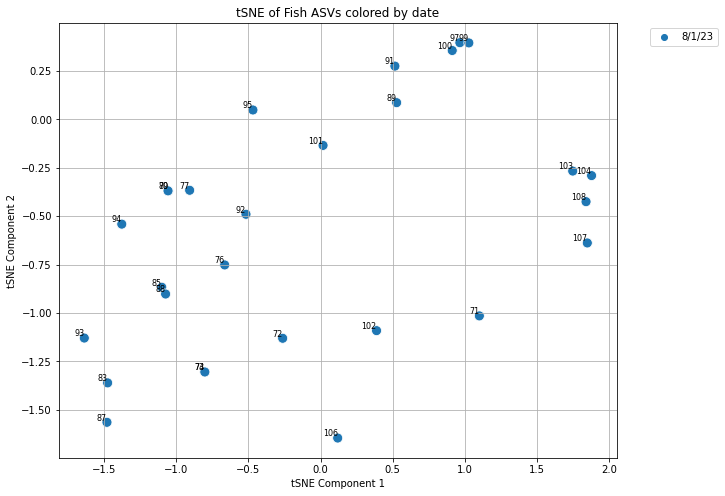

In [6]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
tsne = TSNE(n_components=2, random_state=30, perplexity=20, learning_rate=10, n_iter=1000) #test with diff perplexity
tsne_result = tsne.fit_transform(fish_asvs)
# Perform t-SNE

# Add t-SNE results to the dataframe
df['tSNE1'] = tsne_result[:, 0]
df['tSNE2'] = tsne_result[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(x='tSNE1', y='tSNE2', data=df, hue='date', s=100, palette='tab10')

# Annotate points with station numbers
for i, station in enumerate(df['station']):
    plt.annotate(station, (df['tSNE1'].iloc[i], df['tSNE2'].iloc[i]), fontsize=8, color='black', ha='right', va='bottom')

# plt.title('tSNE of Fish ASVs colored by date')
# plt.xlabel('tSNE Component 1')
# plt.ylabel('tSNE Component 2')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.grid(True)
# plt.show()



/Users/henrysun_1/.local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


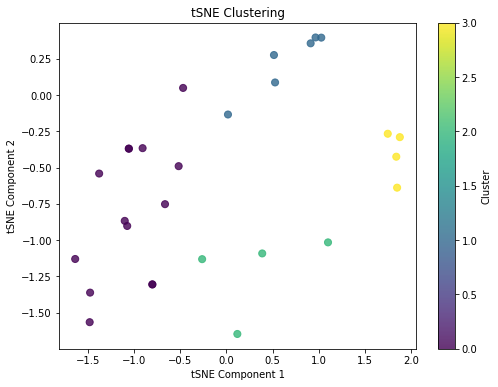

,Method,Silhouette Score,Davies-Bouldin Index,Calinski-Harabasz Index,Labels
0,t-SNE,0.515719,0.598074,42.846508,"[1, 1, 2, 3, 3, 2, 3, 3, 2, 2, 0, 0, 0, 0, 0, ..."


In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.manifold import trustworthiness
def compute_clustering_metrics(df, method_name):
    kmeans = KMeans(n_clusters=4, random_state=42).fit(df.iloc[:, :2])  # Adjust the number of clusters
    labels = kmeans.labels_
    
    silhouette = silhouette_score(df.iloc[:, :2], labels)
    davies_bouldin = davies_bouldin_score(df.iloc[:, :2], labels)
    calinski_harabasz = calinski_harabasz_score(df.iloc[:, :2], labels)
    
    return {
        'Method': method_name,
        'Silhouette Score': silhouette,
        'Davies-Bouldin Index': davies_bouldin,
        'Calinski-Harabasz Index': calinski_harabasz,
        'Labels': labels,
        # 'Dates': data['date']
        # 'Dates': pd.to_datetime(data.iloc[:, 2], format='%m/%d/%y')  # Convert dates to datetime for plotting
    }
def plot_clusters(df, method_name, labels):
    plt.figure(figsize=(8, 6))
    plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=labels, cmap='viridis', s=50, alpha=0.8)
    plt.title(f'{method_name} Clustering')
    plt.xlabel(f'{method_name} Component 1')
    plt.ylabel(f'{method_name} Component 2')
    plt.colorbar(label='Cluster')
    plt.show()

# Function to compute trustworthiness
def compute_trustworthiness(original_data, reduced_data, n_neighbors=5):
    return trustworthiness(original_data, reduced_data.iloc[:, :2], n_neighbors=n_neighbors)
tsne_data = df[['tSNE1', 'tSNE2']]
tsne_metrics = compute_clustering_metrics(tsne_data, 't-SNE')
metrics_df = pd.DataFrame([tsne_metrics])
plot_clusters(tsne_data, 'tSNE', tsne_metrics['Labels'])
metrics_df


/Users/henrysun_1/.local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/henrysun_1/.local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/henrysun_1/.local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/henrysun_1/.local/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/henrysun_

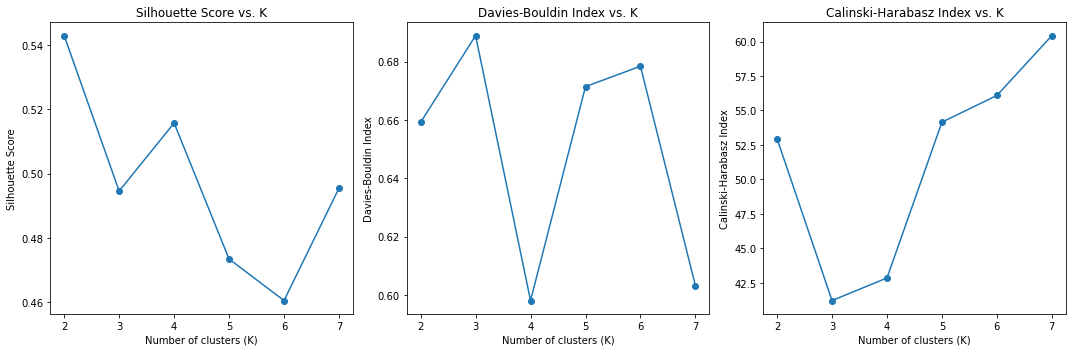

In [25]:
## Determining optimal cluster number

def compute_clustering_metrics(df, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(df)
    labels = kmeans.labels_
    silhouette = silhouette_score(df, labels)
    davies_bouldin = davies_bouldin_score(df, labels)
    calinski_harabasz = calinski_harabasz_score(df, labels)
    return silhouette, davies_bouldin, calinski_harabasz


tsne_data = df[['tSNE1', 'tSNE2']]

# Define range of K
k_values = range(2, 8)  # Example range from 2 to 10 clusters
silhouette_scores = []
davies_bouldin_indices = []
calinski_harabasz_indices = []

# Compute metrics for each K
for k in k_values:
    silhouette, davies_bouldin, calinski_harabasz = compute_clustering_metrics(tsne_data, k)
    silhouette_scores.append(silhouette)
    davies_bouldin_indices.append(davies_bouldin)
    calinski_harabasz_indices.append(calinski_harabasz)

# Plot the metrics
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')

plt.subplot(1, 3, 2)
plt.plot(k_values, davies_bouldin_indices, marker='o')
plt.title('Davies-Bouldin Index vs. K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Davies-Bouldin Index')

plt.subplot(1, 3, 3)
plt.plot(k_values, calinski_harabasz_indices, marker='o')
plt.title('Calinski-Harabasz Index vs. K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Calinski-Harabasz Index')

plt.tight_layout()
plt.show()
